> # PART TWO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
### MOST OF FUNCTIONS WERE DESCRIPED In PART ONE ###

In [3]:
def get_points(data,k):
    return data.sample(k)

In [4]:
#add distance to the dataframe
def dist(data,Points):
    k = len(Points)
    if k == 3:
        data['dist1'] = abs(data['col1']-Points.iloc[0][0])+abs(data['col2']-Points.iloc[0][1])
        data['dist2'] = abs(data['col1']-Points.iloc[1][0])+abs(data['col2']-Points.iloc[1][1])
        data['dist3'] = abs(data['col1']-Points.iloc[2][0])+abs(data['col2']-Points.iloc[2][1])
    elif k == 5:
        data['dist1'] = abs(data['col1']-Points.iloc[0][0])+abs(data['col2']-Points.iloc[0][1])
        data['dist2'] = abs(data['col1']-Points.iloc[1][0])+abs(data['col2']-Points.iloc[1][1])
        data['dist3'] = abs(data['col1']-Points.iloc[2][0])+abs(data['col2']-Points.iloc[2][1])
        data['dist4'] = abs(data['col1']-Points.iloc[3][0])+abs(data['col2']-Points.iloc[3][1])
        data['dist5'] = abs(data['col1']-Points.iloc[4][0])+abs(data['col2']-Points.iloc[4][1])
    else:
        add_dist(data,Points)

In [5]:
#add distance to the datatframe with k means otherthan 3 or 5
def add_dist(data,Points):
    k = len(Points)
    for i in range(k):
        data[f'dist{i+1}'] = abs(data['col1']-Points.iloc[i][0])+abs(data['col2']-Points.iloc[i][1])

In [6]:
def get_centroid(data):
    l = len(data['Old_Cluster'].value_counts().index)
    point = []
    for i in range(l):
        cluster = data['Old_Cluster'].value_counts().index[i]
        x = data[data['Old_Cluster'] == cluster].mean()
        point.append(x)
    point = pd.DataFrame(point)
    return point

In [7]:
def k_means(data,k):
    
    
    start_time = time.time()
    Points = get_points(data,k)
    dist(data,Points)
    distances = data.iloc[:,2:]
    data['Old_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1)
    
    
    Points = get_centroid(data)
    dist(data,Points)
    distances = data.iloc[:,2:-1] 
    data['New_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1)
    
    
    while(True):
        if( data['New_Cluster'].equals(data['Old_Cluster']) ):
            break
        data['Old_Cluster'] = data['New_Cluster']
        
        Points = get_centroid(data)
        dist(data,Points)
        distances = data.iloc[:,2:-2] 
        data['New_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1)
           
    return data, Points

In [8]:
def PCA(data):
    
    num_components = 2
    covariance = data.cov()  #calculate the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eig(covariance) #getting the egin values and egin vectors
    
    sorted_index = np.argsort(eigen_values)[::-1]            ##sort the eigenvalues in descending order
    sorted_eigenvalue = eigen_values[sorted_index]
    
    sorted_eigenvectors = eigen_vectors[:,sorted_index]     #similarly sort the eigenvectors
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    # select the first n eigenvectors, n is desired dimension
    data = np.dot(eigenvector_subset.transpose() , data.transpose() ).transpose()    #Transform the data 
    data = pd.DataFrame(data,columns = ['col1','col2'])
    return(data)

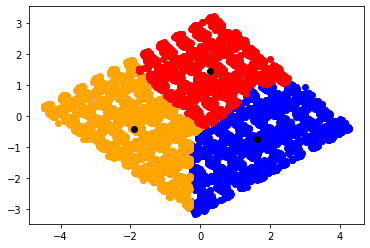

In [9]:
df = pd.read_csv('group14.csv',names=['Height','Weight','BMI','Shoulders','Arms'])
df = (df - df.mean() )/df.std()
df = PCA(df)
df , points = k_means(df,3)
color = ['blue','orange','red']
for i in range(3):
    column = f'dist{i+1}'
    d = df[df['Old_Cluster' ] == column ]
    plt.scatter(data = d, x = 'col1',y = 'col2' , c = color[i] )
plt.scatter(data = points , x = 'col1',y = 'col2' , c = 'black')    

26.918% from dist1 cluster
21.028% from dist2 cluster
19.375% from dist3 cluster
16.561% from dist4 cluster
16.118% from dist5 cluster


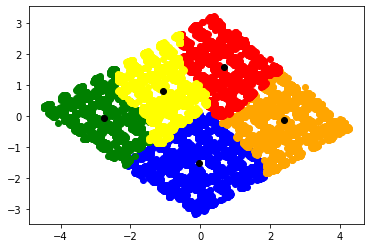

In [12]:
df = pd.read_csv('group14.csv',names=['Height','Weight','BMI','Shoulders','Arms'])
df = (df - df.mean() )/df.std()
df = PCA(df)
df , points = k_means(df,5)
color = ['blue','orange','red','green','yellow']
for i in range(5):
    column = f'dist{i+1}'
    d = df[df['Old_Cluster' ] == column ]
    print( f'{(d.shape[0]/100000)*100 }% from {column} cluster')
    plt.scatter(data = d, x = 'col1',y = 'col2' , c = color[i] )
plt.scatter(data = points , x = 'col1',y = 'col2' , c = 'black')  